<a href="https://colab.research.google.com/github/givanildomadeiro/PROJ_BI_MASTER/blob/main/Refinarias_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mip

In [2]:
import matplotlib.pyplot as plt
from math import sqrt, log
from itertools import product
from mip import Model, xsum, minimize, OptimizationStatus

In [3]:
# Refinarias com suas Coordenadas (p) e Capacidades (c)
# R1: Norte :: R2: Nordeste :: R3: Sudeste
Refinarias = [1, 2, 3]
pRefinarias = {1: (38, 180), 2: (95, 165), 3: (80, 60)}
cRefinarias = {1: 700, 2: 2400, 3: 2200}

# Clientes com suas localizações (p) e Demandas (d)
Clientes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pClientes = {1: (45, 220), 2: (25, 130), 3: (55, 110), 4: (90, 105), 5: (65, 180), 6: (70, 80), 7: (74, 32), 8: (66, 18), 9: (69, 0), 10: (80, 165), 11: (90, 50), 12: (100, 136)}
dClientes = {1: 302, 2: 273, 3: 275, 4: 266, 5: 87, 6: 296, 7: 297, 8: 310, 9: 302, 10: 309, 11: 420, 12: 100}


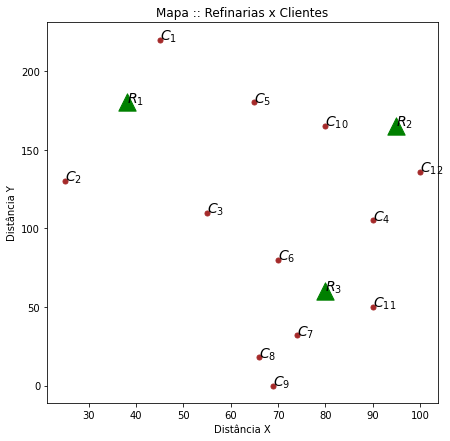

In [4]:
# Plotando as localizações das Refinarias e Clientes
plt.figure(figsize=(7,7))
plt.title("Mapa :: Refinarias x Clientes")
plt.xlabel("Distância X")
plt.ylabel("Distância Y")

# Refinarias
for i, p in pRefinarias.items():
    plt.scatter((p[0]), (p[1]), marker="^", color="green", s=300)
    plt.text((p[0]), (p[1]), "$R_%d$" % i, size=14)

# Clientes
for i, p in pClientes.items():
    plt.scatter((p[0]), (p[1]), marker="o", color="brown", s=25)
    plt.text((p[0]), (p[1]), "$C_{%d}$" % i, size=14)

In [5]:
# Cálculo da Distância
dist = {(f, c): round(sqrt((pRefinarias[f][0] - pClientes[c][0]) ** 2 + (pRefinarias[f][1] - pClientes[c][1]) ** 2), 1)
        for (f, c) in product(Refinarias, Clientes) }
#print(dist)

In [6]:
# Criação do Modelo
modelo = Model()

# Capacidades: adicionando a variável de capacidade no Modelo (usado para limitar quando zerar o estoque)
zRefinarias = {i: modelo.add_var(ub=cRefinarias[i]) for i in Refinarias}  

In [7]:
# Volume que a Refinaria "i" vai fornecer ao Cliente "j"
xRefinarias = {(i, j): modelo.add_var() for (i, j) in product(Refinarias, Clientes)}

# Atender a Demanda
for j in Clientes:
    modelo += xsum(xRefinarias[(i, j)] for i in Refinarias) == dClientes[j]

In [8]:
# Trabalha os limites que as Refinarias tem e o volume consumo 
for i in Refinarias:
    modelo += zRefinarias[i] >= xsum(xRefinarias[(i, j)] for j in Clientes)

Solução com o melhor Custo: 117136.0
Capacidades R1, R2 e R3: [700.0, 2400.0, 2200.0] 


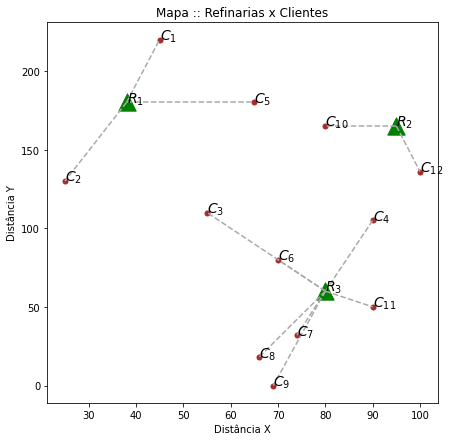

In [9]:
# Função Objetivo (Otimização)
modelo.objective = minimize(
    xsum(dist[i, j] * xRefinarias[i, j] for (i, j) in product(Refinarias, Clientes)) )
modelo.optimize()

plt.figure(figsize=(7,7))
plt.title("Mapa :: Refinarias x Clientes")
plt.xlabel("Distância X")
plt.ylabel("Distância Y")

# Refinarias
for i, p in pRefinarias.items():
    plt.scatter((p[0]), (p[1]), marker="^", color="green", s=300)
    plt.text((p[0]), (p[1]), "$R_%d$" % i, size=14)

# Clientes
for i, p in pClientes.items():
    plt.scatter((p[0]), (p[1]), marker="o", color="brown", s=25)
    plt.text((p[0]), (p[1]), "$C_{%d}$" % i, size=14)

if modelo.num_solutions:
    print("Solução com o melhor Custo: {}".format(modelo.objective_value))
    print("Capacidades R1, R2 e R3: {} ".format([zRefinarias[f].x for f in Refinarias]))
#    print("Custos Totais por Refinaria: {}".format([y[f].x for f in Refinarias]))

    # Plotando as alocações
    for (i, j) in [(i, j) for (i, j) in product(Refinarias, Clientes) if xRefinarias[(i, j)].x >= 1e-6]:
        plt.plot(
            (pRefinarias[i][0], pClientes[j][0]), (pRefinarias[i][1], pClientes[j][1]), linestyle="--", color="darkgray"
        )